In [116]:
## Import Dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
import requests
from config import api_token
from pprint import pprint
from datetime import datetime, timedelta
import numpy as np

import yfinance as yf
## https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy#holdings

sp500_df = pd.read_csv('s&p500.csv')

In [3]:
 # 0. Script the data from yfinance

In [4]:
##0.1  Get a list of all unique Tickers
sp500_df = sp500_df.dropna()

ticker_list = list(sp500_df['Ticker'])
sp500_df

,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,Apple Inc.,AAPL,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,Microsoft Corporation,MSFT,59491810,2588173,6.065087,Information Technology,82019920.0,USD
2,Amazon.com Inc.,AMZN,2313510,2000019,2.738040,Consumer Discretionary,98231640.0,USD
3,NVIDIA Corporation,NVDA,67066G10,2379504,1.923625,Information Technology,27105582.0,USD
4,Alphabet Inc. Class A,GOOGL,02079K30,BYVY8G0,1.825088,Communication Services,65626300.0,USD
...,...,...,...,...,...,...,...,...
499,Fox Corporation Class B,FOX,35137L20,BJJMGY5,0.012028,Communication Services,1532395.0,USD
500,Lincoln National Corp,LNC,53418710,2516378,0.009445,Financials,1698362.0,USD
501,First Republic Bank,FRC,33616C10,B4WHY15,0.008411,Financials,2003120.0,USD
502,News Corporation Class B,NWS,65249B20,BBGVT51,0.006133,Communication Services,1341504.0,USD


In [5]:
## There are 504 Tickers in the S&P 500
first_hundred_tickers = ticker_list[:100]

In [6]:
#0.2 Get the sp500 price data from yfinance 
# Create an empty DataFrame to store the yearly highest, lowest, open, and close prices
stocks_df = pd.DataFrame(columns=['Symbol','Year','Highest', 'Lowest', 'Open', 'Close'])

In [7]:
# Define a list of 100 stock symbols
stock_symbols = first_hundred_tickers
# Replace with your list of stock symbols

# Calculate the start and end dates for 10 years ago
start_date = '2013-01-01'
end_date = '2022-12-31'

# Fetch the yearly highest, lowest, open, and close prices for each stock
for symbol in stock_symbols:
    yearly_data = {}
    stock_data = {}
    try:
        
        stock_data = yf.download(symbol, start=start_date, end=end_date)
    
        # Add a column with the year of each data point
        stock_data['Year'] = stock_data.index.to_period('Y').strftime('%Y').astype(int)

        # Group the data by year and calculate the yearly highest, lowest, open, and close prices
        yearly_group = stock_data.groupby('Year')
        highest = yearly_group['High'].max()
        lowest = yearly_group['Low'].min()
        first = yearly_group['Open'].first()
        last = yearly_group['Close'].last()
    
        # Add the stock symbol to the yearly_data DataFrame and reset its index
        yearly_data['Symbol'] = symbol
        yearly_data['Highest'] = highest
        yearly_data['Lowest'] = lowest
        yearly_data['Open'] = first
        yearly_data['Close'] = last 
        
        yearly_df = pd.DataFrame(yearly_data)
        yearly_df_reset = yearly_df.reset_index().rename(columns={'index': 'Year'})
        
        #Append the yearly_data DataFrame to the stocks_df DataFrame
        stocks_df = pd.concat([stocks_df, yearly_df_reset], axis=0, ignore_index=True)

    except:
        print("Stock not found. Skipping...")
        pass
     
print("finished")
# Display the DataFrame with 100 stocks and their yearly highest, lowest, open, and close prices
stocks_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
Stock not found. Skipping...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[**

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
983,CI,2018,227.130005,163.020004,204.139999,189.919998
984,CI,2019,207.279999,141.949997,187.690002,204.490005
985,CI,2020,224.960007,118.500000,205.389999,208.179993
986,CI,2021,272.809998,190.880005,209.139999,229.630005


In [8]:
stocks_df

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
983,CI,2018,227.130005,163.020004,204.139999,189.919998
984,CI,2019,207.279999,141.949997,187.690002,204.490005
985,CI,2020,224.960007,118.500000,205.389999,208.179993
986,CI,2021,272.809998,190.880005,209.139999,229.630005


In [9]:
# Export the 100 stocks_Data into a csv
stocks_df.to_csv("../output_data/stock100.csv")

In [11]:
# Create an empty DataFrame to store the yearly highest, lowest, open, and close prices
stocks_df2 = pd.DataFrame(columns=['Symbol','Year','Highest', 'Lowest', 'Open', 'Close'])

In [12]:
# Define a list of 500 stock symbols
stock_symbols2 = ticker_list
# Replace with your list of stock symbols

# Calculate the start and end dates for 10 years ago
start_date = '2013-01-01'
end_date = '2022-12-31'

# Fetch the yearly highest, lowest, open, and close prices for each stock
for symbol in stock_symbols2:
    yearly_data = {}
    stock_data = {}
    print(symbol)
    try:
        
        stock_data = yf.download(symbol, start=start_date, end=end_date)
    
        # Add a column with the year of each data point
        stock_data['Year'] = stock_data.index.to_period('Y').strftime('%Y').astype(int)

        # Group the data by year and calculate the yearly highest, lowest, open, and close prices
        yearly_group = stock_data.groupby('Year')
        highest = yearly_group['High'].max()
        lowest = yearly_group['Low'].min()
        first = yearly_group['Open'].first()
        last = yearly_group['Close'].last()
    
        # Add the stock symbol to the yearly_data DataFrame and reset its index
        yearly_data['Symbol'] = symbol
        yearly_data['Highest'] = highest
        yearly_data['Lowest'] = lowest
        yearly_data['Open'] = first
        yearly_data['Close'] = last 
        
        yearly_df = pd.DataFrame(yearly_data)
        yearly_df_reset = yearly_df.reset_index().rename(columns={'index': 'Year'})
        
        #Append the yearly_data DataFrame to the stocks_df DataFrame
        stocks_df2 = pd.concat([stocks_df2, yearly_df_reset], axis=0, ignore_index=True)
        
    except:
        print("Stock not found. Skipping...")
        pass
     
print("finished")
# Display the DataFrame with 100 stocks and their yearly highest, lowest, open, and close prices
stocks_df2

AAPL
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
GOOGL
[*********************100%***********************]  1 of 1 completed
BRK.B
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
Stock not found. Skipping...
GOOG
[*********************100%***********************]  1 of 1 completed
XOM
[*********************100%***********************]  1 of 1 completed
META
[*********************100%***********************]  1 of 1 completed
UNH
[*********************100%***********************]  1 of 1 completed
TSLA
[*********************100%***********************]  1 of 1 completed
JNJ
[*********************100%***********************]  1 of 1 completed
JPM
[********

[*********************100%***********************]  1 of 1 completed
VICI
[*********************100%***********************]  1 of 1 completed
AMP
[*********************100%***********************]  1 of 1 completed
CMI
[*********************100%***********************]  1 of 1 completed
FIS
[*********************100%***********************]  1 of 1 completed
DD
[*********************100%***********************]  1 of 1 completed
DLTR
[*********************100%***********************]  1 of 1 completed
BK
[*********************100%***********************]  1 of 1 completed
ODFL
[*********************100%***********************]  1 of 1 completed
ON
[*********************100%***********************]  1 of 1 completed
PEG
[*********************100%***********************]  1 of 1 completed
GEHC
[*********************100%***********************]  1 of 1 completed
AME
[*********************100%***********************]  1 of 1 completed
ROK
[*********************100%***********************]

[*********************100%***********************]  1 of 1 completed
RJF
[*********************100%***********************]  1 of 1 completed
WAB
[*********************100%***********************]  1 of 1 completed
VTR
[*********************100%***********************]  1 of 1 completed
DRI
[*********************100%***********************]  1 of 1 completed
CMS
[*********************100%***********************]  1 of 1 completed
STLD
[*********************100%***********************]  1 of 1 completed
NVR
[*********************100%***********************]  1 of 1 completed
NTRS
[*********************100%***********************]  1 of 1 completed
FICO
[*********************100%***********************]  1 of 1 completed
EXPD
[*********************100%***********************]  1 of 1 completed
CAG
[*********************100%***********************]  1 of 1 completed
SEDG
[*********************100%***********************]  1 of 1 completed
TSN
[*********************100%********************

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999


In [16]:
# Export the 500_Data into a csv
stocks_df2.to_csv("../output_data/stock500.csv")

In [ ]:
##0.3 Create dataframe for 10 years return analysis 0f sp 500

In [59]:
# Define a list of 500 stock symbols
stock_symbols3 = ticker_list
# Replace with your list of stock symbols

# Calculate the start and end dates for 10 years ago
start_date = '2013-01-01'
end_date = '2022-12-31'

stocks_data = {}
symbols=[]
open_prices=[]
close_prices=[]
# Fetch the yearly highest, lowest, open, and close prices for each stock
for symbol in stock_symbols3: 
    try:
        stocks_data = {}
    
        #Get data from yfinance
        stock_data = yf.download(symbol, start=start_date, end=end_date)

        # Get the 10 years open, and close prices
        
        open_prices.append(stock_data.iloc[0,0])
        close_prices.append(stock_data.iloc[-1,3])
        symbols.append(symbol)
    except:
        print(f"{symbol}did not find")
        pass



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
BRK.Bdid not find
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Symbol,Highest,Lowest
0,AAPL,19.779285,129.929993
1,MSFT,27.250000,239.820007
2,AMZN,12.804000,84.000000
3,NVDA,3.140000,146.139999
4,GOOGL,18.003504,88.230003
...,...,...,...
496,FOX,38.599998,28.450001
497,LNC,26.719999,30.719999
498,FRC,33.410000,121.889999
499,NWS,15.210000,18.440001


In [63]:
# Create an empty DataFrame to store the yearly highest, lowest, open, and close prices
stocks_df3 = pd.DataFrame(columns=['Symbol', 'Open', 'Close'])

In [150]:
# Add the data to the DataFrame 
stocks_data['Symbol'] = symbols
stocks_data['2013 Open Price'] = open_prices
stocks_data['2022 Close Price'] = close_prices
    
stocks_df3 = pd.DataFrame(stocks_data)

# Display the DataFrame with 100 stocks and their yearly highest, lowest, open, and close prices
stocks_df3

,Symbol,Highest,Lowest,2013 Open Price,2022 Close Price
0,AAPL,19.779285,129.929993,19.779285,129.929993
1,MSFT,27.250000,239.820007,27.250000,239.820007
2,AMZN,12.804000,84.000000,12.804000,84.000000
3,NVDA,3.140000,146.139999,3.140000,146.139999
4,GOOGL,18.003504,88.230003,18.003504,88.230003
...,...,...,...,...,...
496,FOX,38.599998,28.450001,38.599998,28.450001
497,LNC,26.719999,30.719999,26.719999,30.719999
498,FRC,33.410000,121.889999,33.410000,121.889999
499,NWS,15.210000,18.440001,15.210000,18.440001


In [151]:
#Calculate the 10 years Return and store in DF
stocks_df3["10 Years Return(%)"]=(stocks_df3['2022 Close Price']-stocks_df3['2013 Open Price'])/stocks_df3['2013 Open Price']*100

stocks_df3

,Symbol,Highest,Lowest,2013 Open Price,2022 Close Price,10 Years Return(%)
0,AAPL,19.779285,129.929993,19.779285,129.929993,556.899326
1,MSFT,27.250000,239.820007,27.250000,239.820007,780.073421
2,AMZN,12.804000,84.000000,12.804000,84.000000,556.044991
3,NVDA,3.140000,146.139999,3.140000,146.139999,4554.139952
4,GOOGL,18.003504,88.230003,18.003504,88.230003,390.071290
...,...,...,...,...,...,...
496,FOX,38.599998,28.450001,38.599998,28.450001,-26.295332
497,LNC,26.719999,30.719999,26.719999,30.719999,14.970060
498,FRC,33.410000,121.889999,33.410000,121.889999,264.830889
499,NWS,15.210000,18.440001,15.210000,18.440001,21.236032


In [153]:
# Clean the data
renamed_df = stocks_df3.rename(columns={"Symbol":"Ticker"})
df = pd.merge(renamed_df, sp500_df, on="Ticker")
ten_years_df = df[["Ticker","Name","10 Years Return(%)","Weight","Sector"]]
ten_years_df

,Ticker,Name,10 Years Return(%),Weight,Sector
0,AAPL,Apple Inc.,556.899326,7.110275,Information Technology
1,MSFT,Microsoft Corporation,780.073421,6.065087,Information Technology
2,AMZN,Amazon.com Inc.,556.044991,2.738040,Consumer Discretionary
3,NVDA,NVIDIA Corporation,4554.139952,1.923625,Information Technology
4,GOOGL,Alphabet Inc. Class A,390.071290,1.825088,Communication Services
...,...,...,...,...,...
496,FOX,Fox Corporation Class B,-26.295332,0.012028,Communication Services
497,LNC,Lincoln National Corp,14.970060,0.009445,Financials
498,FRC,First Republic Bank,264.830889,0.008411,Financials
499,NWS,News Corporation Class B,21.236032,0.006133,Communication Services


In [154]:
# Export the 10 years into a csv
ten_years_df.to_csv("../output_data/tenyears.csv")

In [ ]:
## 1.Calculate the yearly return and create a DF 

In [17]:
## read the price 500 stocks price data
sp500price_df = pd.read_csv('../output_data/stock500.csv')
sp500price_df = sp500price_df .dropna()
del sp500price_df["Unnamed: 0"]

In [20]:
sp500price_df

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999


In [21]:
unique = sp500price_df['Symbol'].unique()
len(unique)

501

In [22]:
# Calculate the yearly return for each stock, which is the percentage change in price from the beginning of the year to the end of the year.
sp500price_df['Yearly Return (%)'] = (sp500price_df['Close']-sp500price_df['Open'])/sp500price_df['Open']*100
sp500price_df['Yearly Moving (%)'] = (sp500price_df['Highest']-sp500price_df['Lowest'])/sp500price_df['Lowest']*100
sp500price_df

,Symbol,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%)
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196
...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119


In [23]:
# merge the price file and stock information file
renamed_df = sp500price_df.rename(columns={"Symbol":"Ticker"})
merge_df = pd.merge(renamed_df, sp500_df, on="Ticker")
merge_df.head(25)

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
5,AAPL,2018,58.367500,36.647499,42.540001,39.435001,-7.299011,59.267349,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
6,AAPL,2019,73.492500,35.500000,38.722500,73.412498,89.586155,107.021128,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
7,AAPL,2020,138.789993,53.152500,74.059998,132.690002,79.165551,161.116585,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
8,AAPL,2021,182.130005,116.209999,133.520004,177.570007,32.991313,56.724900,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
9,AAPL,2022,182.940002,125.870003,177.830002,129.929993,-26.935842,45.340429,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD


In [110]:
# Export the Data into a csv
merge_df.to_csv("../output_data/merge.csv")

In [90]:
 ## 2. Calculate the weighted yearly return moving and create a DF 

## Plot Sectors Yearly moving and changing

In [27]:
#read the 500 stocks data
merge_df = pd.read_csv('../output_data/merge.csv')
del merge_df["Unnamed: 0"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD


In [28]:
# Calculated the Weighted Yearly Return and Moving
merge_df["Weighted Yearly Return"] = merge_df["Yearly Return (%)"]*merge_df["Weight"]
merge_df["Weighted Yearly Moving"] = merge_df["Yearly Moving (%)"]*merge_df["Weight"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,9.243800,350.879490
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,277.639515,496.588378
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,-39.129156,328.772881
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,91.537594,232.214420
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,328.067298,386.864348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.257545,0.624673
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.242905,0.447673
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.052345,0.794582
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.000164,0.345278


In [32]:
# Calculate the Price-to-Earnings (P/E) Ratio of each company\
merge_df["P/E Ratio"] = merge_df["Yearly Return (%)"]/merge_df["Close"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving,P/E Ratio
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,9.243800,350.879490,0.064885
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,277.639515,496.588378,1.415026
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,-39.129156,328.772881,-0.209127
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,91.537594,232.214420,0.444621
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,328.067298,386.864348,1.090584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.257545,0.624673,-1.939117
4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.242905,0.447673,1.287492
4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.052345,0.794582,-0.304301
4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.000164,0.345278,0.000950


In [ ]:
## 3. Grouped the date by SECTORs and PLOTING

In [29]:
# Calculate the weight yearly return for each sector
grouped = merge_df.groupby(["Sector","Year"])
weighted_return_sector = grouped["Weighted Yearly Return"].mean()
df = pd.DataFrame(weighted_return_sector)
df = df.reset_index().rename(columns={'index': 'Sector'})
df

,Sector,Year,Weighted Yearly Return
0,Communication Services,2013,25.335798
1,Communication Services,2014,2.902466
2,Communication Services,2015,13.241167
3,Communication Services,2016,4.091127
4,Communication Services,2017,10.875608
...,...,...,...
105,Utilities,2018,0.163513
106,Utilities,2019,2.426936
107,Utilities,2020,-0.075121
108,Utilities,2021,1.355889


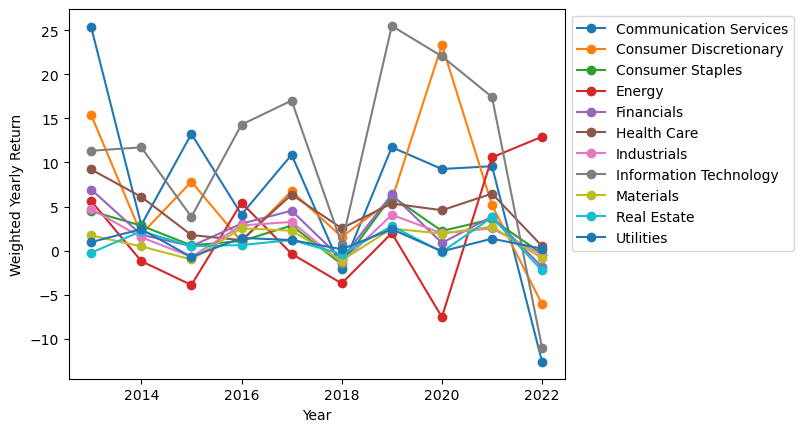

In [30]:
fig, ax = plt.subplots()

for sector in df['Sector'].unique():
    subset = df[df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Return'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Return')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [31]:
# Calculate the weight yearly moving for each sector
grouped = merge_df.groupby(["Sector","Year"])
weighted_moving_sector = grouped["Weighted Yearly Moving"].mean()
df = pd.DataFrame(weighted_moving_sector)
df = df.reset_index().rename(columns={'index': 'Sector'})
df

,Sector,Year,Weighted Yearly Moving
0,Communication Services,2013,32.508770
1,Communication Services,2014,13.163667
2,Communication Services,2015,22.023521
3,Communication Services,2016,13.394258
4,Communication Services,2017,15.596372
...,...,...,...
105,Utilities,2018,3.324006
106,Utilities,2019,5.103118
107,Utilities,2020,8.018645
108,Utilities,2021,3.048522


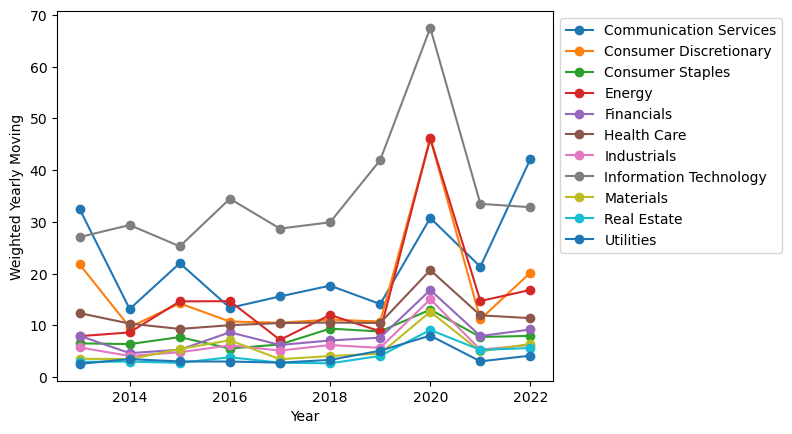

In [127]:
# Plot the moving data
fig, ax = plt.subplots()

for sector in df['Sector'].unique():
    subset = df[df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Moving'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Moving')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
## 4.Ten year Return Analysis

In [155]:
#read the 10 years data
ten_year_df = pd.read_csv('../output_data/tenyears.csv')
del ten_year_df["Unnamed: 0"]
ten_years_df

,Ticker,Name,10 Years Return(%),Weight,Sector
0,AAPL,Apple Inc.,556.899326,7.110275,Information Technology
1,MSFT,Microsoft Corporation,780.073421,6.065087,Information Technology
2,AMZN,Amazon.com Inc.,556.044991,2.738040,Consumer Discretionary
3,NVDA,NVIDIA Corporation,4554.139952,1.923625,Information Technology
4,GOOGL,Alphabet Inc. Class A,390.071290,1.825088,Communication Services
...,...,...,...,...,...
496,FOX,Fox Corporation Class B,-26.295332,0.012028,Communication Services
497,LNC,Lincoln National Corp,14.970060,0.009445,Financials
498,FRC,First Republic Bank,264.830889,0.008411,Financials
499,NWS,News Corporation Class B,21.236032,0.006133,Communication Services


In [157]:
stocks_df = ten_years_df.sort_values('10 Years Return(%)', ascending=False).head(50)
stocks_df.head(10)

,Ticker,Name,10 Years Return(%),Weight,Sector
244,ENPH,Enphase Energy Inc.,6746.511610,0.088276,Information Technology
9,TSLA,Tesla Inc.,5179.143589,1.264166,Consumer Discretionary
3,NVDA,NVIDIA Corporation,4554.139952,1.923625,Information Technology
151,DXCM,DexCom Inc.,3161.050974,0.138081,Health Care
49,AMD,Advanced Micro Devices Inc.,2439.999916,0.408285,Information Technology
47,NFLX,Netflix Inc.,2068.007532,0.423701,Communication Services
365,EPAM,EPAM Systems Inc.,1669.654331,0.046344,Information Technology
388,PAYC,Paycom Software Inc.,1633.575442,0.041894,Information Technology
20,AVGO,Broadcom Inc.,1624.113474,0.766771,Information Technology
308,MPWR,Monolithic Power Systems Inc.,1451.601453,0.061209,Information Technology


In [183]:
# Double check the result (the return is SO HIGH)
stocks_df3.loc[stocks_df3["Symbol"]=="ENPH"]

,Symbol,Highest,Lowest,2013 Open Price,2022 Close Price,10 Years Return(%)
244,ENPH,3.87,264.959991,3.87,264.959991,6746.51161


In [162]:
# count higher return stocks in different sectors
numbers = stocks_df.groupby("Sector").count()["Ticker"]
top_50_stocks = pd.DataFrame({"stocks number":numbers})
top_50_stocks = top_50_stocks.sort_values("stocks number", ascending=False)

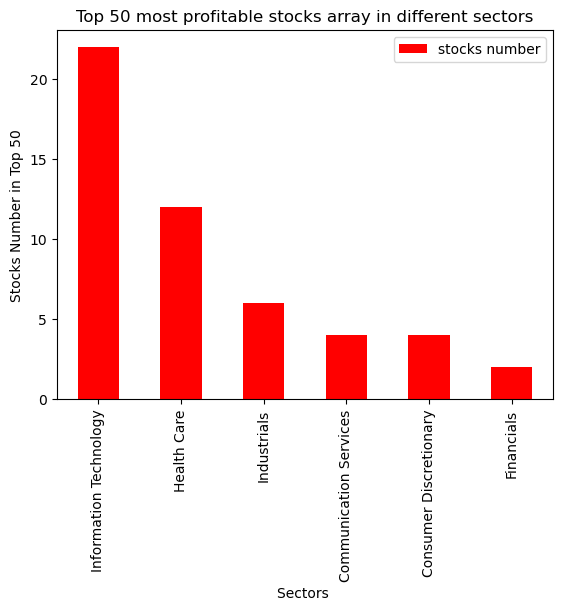

In [163]:
#Ploting the counting result 
pie_plot=top_50_stocks.plot.bar(y="stocks number",color='r')

# Set labels
plt.title("Top 50 most profitable stocks array in different sectors")
plt.xlabel("Sectors ")
plt.ylabel("Stocks Number in Top 50")
plt.show()

In [167]:
# Calculate the average 10 year return of each sector
sector_teny_grouped=ten_years_df.groupby("Sector")
sector_teny_return = sector_teny_grouped["10 Years Return(%)"].mean()
sector_return_df = pd.DataFrame(sector_teny_return)
sector_df =sector_return_df.sort_values("10 Years Return(%)", ascending=False)
sector_df

,10 Years Return(%)
Sector,
Information Technology,684.161566
Health Care,404.576149
Consumer Discretionary,311.603026
Communication Services,304.781282
Industrials,257.150670
Financials,234.460341
Consumer Staples,153.043137
Materials,140.282962
Utilities,112.403582


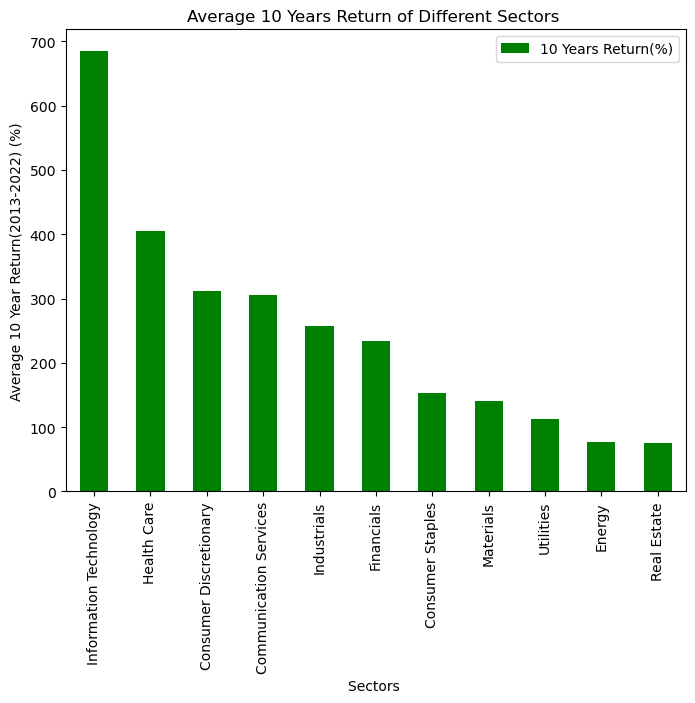

In [169]:
sector_df.plot(kind="bar",color='g', figsize=(8,6))
plt.title("Average 10 Years Return of Different Sectors ")
plt.xlabel("Sectors ")
plt.ylabel("Average 10 Year Return(2013-2022) (%)")
plt.show()

In [ ]:
# top 3 stocks with highest 10 year return

In [172]:
# find the top 3 weighted company of each sector

# Custom function to get the top 3 rows in each group based on the '10 Years Return' column
def top_3(group):
    return group.sort_values(by="10 Years Return(%)", ascending=False).head(3)

top_3_10year_group =ten_years_df.groupby('Sector').apply(top_3)
top_3_ax = top_3_10year_group[["Ticker","10 Years Return(%)"]]
top_3_ax.reset_index(inplace=True)
del top_3_ax["level_1"]

top_3_ax

,Sector,Ticker,10 Years Return(%)
0,Communication Services,NFLX,2068.007532
1,Communication Services,TTWO,828.074820
2,Communication Services,EA,727.217309
3,Consumer Discretionary,TSLA,5179.143589
4,Consumer Discretionary,ORLY,830.983891
5,Consumer Discretionary,CZR,775.789442
6,Consumer Staples,STZ,544.645327
7,Consumer Staples,MNST,467.206709
8,Consumer Staples,DG,454.492233
9,Energy,FANG,602.877725


In [173]:
# get a colors list
colors_to_repeat = ['r', 'g', 'b','c','m','y','k','orange','gray','tan','navy']

color_list = []

for color in colors_to_repeat:
    color_list.extend([color] * 3)

In [174]:

bar_value = top_3_ax["10 Years Return(%)"]
x_axis = np.arange(len(top_3_ax["Ticker"]))
color = color_list
tick_locations = [value for value in x_axis]
tick_name = top_3_ax["Ticker"]

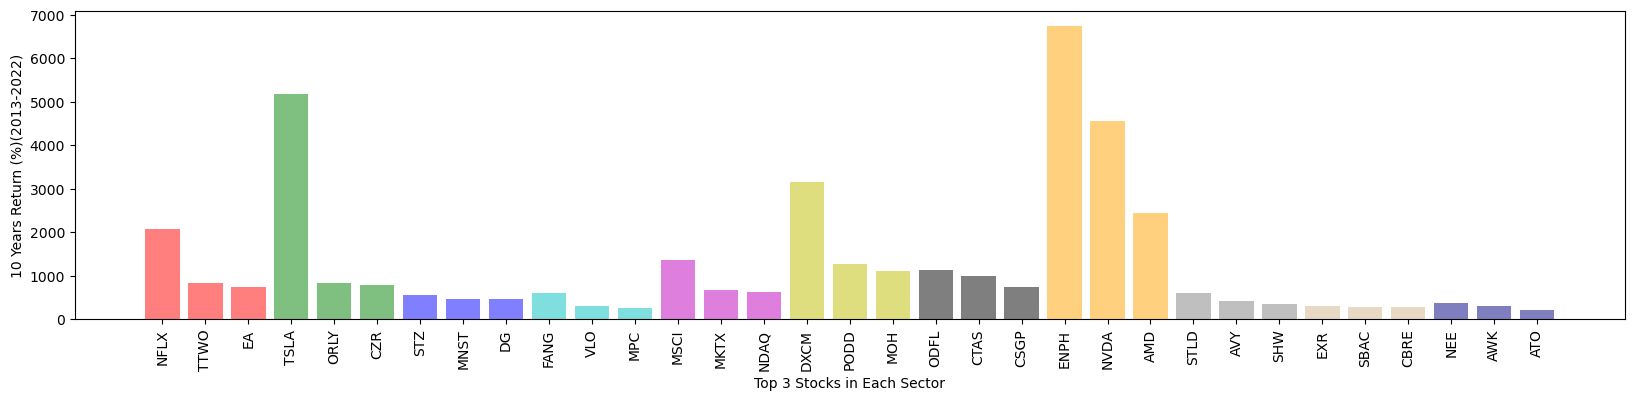

In [175]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, bar_value, color=color_list, alpha=0.5, align="center")
plt.xticks(tick_locations, tick_name)
plt.xticks(rotation=90)

plt.xlabel("Top 3 Stocks in Each Sector")
plt.ylabel("10 Years Return (%)(2013-2022)")
plt.show()